<a href="https://colab.research.google.com/github/sanjay7178/pytorch-dip/blob/main/Python_Study_of_sharpening_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl "https://fastly.picsum.photos/id/866/450/300.jpg?hmac=LjxXLARrOTbivRrQD3Z2n3fNVwGNy21JDJduhoRLJ-s" --output 300.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11563  100 11563    0     0  56332      0 --:--:-- --:--:-- --:--:-- 56131


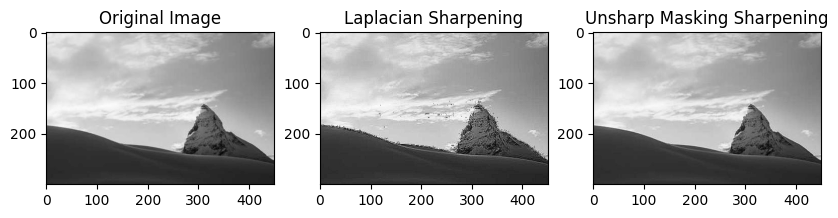

In [2]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/300.jpg')  # Replace 'image.jpg' with your image path

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Laplacian filter
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
sharpened_laplacian = gray_image - laplacian

# Apply Unsharp Masking filter
gaussian = cv2.GaussianBlur(gray_image, (5, 5), 0)
sharpened_unsharp = cv2.addWeighted(gray_image, 1.5, gaussian, -0.5, 0)

# Convert the results back to uint8
sharpened_laplacian = np.uint8(np.absolute(sharpened_laplacian))
sharpened_unsharp = np.uint8(sharpened_unsharp)


# Display the results using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(gray_image, cmap='gray');plt.title("Original Image");
plt.subplot(132);plt.imshow(sharpened_laplacian, cmap='gray');plt.title("Laplacian Sharpening");
plt.subplot(133);plt.imshow(sharpened_unsharp, cmap='gray');plt.title("Unsharp Masking Sharpening");